In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import logging
from environmental_risk_metrics import Sentinel2
from IPython.display import Image

# Configure logging to display in Jupyter
logging.basicConfig(
    level=logging.INFO,
    format="%(asctime)s - %(name)s - %(levelname)s - %(message)s",
    force=True,  # This ensures the configuration is applied even if logging was previously configured
)
logger = logging.getLogger(__name__)


sentinel2 = Sentinel2()

polygon = {
    "type": "Feature",
    "properties": {},
    "geometry": {
        "coordinates": [
            [
                [10.235198982658801, 51.42076009745068],
                [10.236477278753114, 51.41697045550828],
                [10.244461712820623, 51.41823370440062],
                [10.242888425319222, 51.4220355049745],
                [10.235198982658801, 51.42076009745068],
            ]
        ],
        "type": "Polygon",
    },
}
start_date="2015-06-27"
end_date="2024-12-31"


ndvi_images = sentinel2.load_ndvi_images(
    start_date=start_date,
    end_date=end_date,
    polygon=polygon,
    cropped_image_cloud_cover_threshold=80,
    entire_image_cloud_cover_threshold=20,
)

ndvi_thumbnails = sentinel2.ndvi_thumbnails(
    ndvi=ndvi_images, polygon=polygon, polygon_crs="EPSG:4326"
)
mean_ndvi_values = sentinel2.calculate_mean_ndvi(
    ndvi_images=ndvi_images,
    polygon=polygon,
    polygon_crs="EPSG:4326",
    interpolate=True,
    start_date=start_date,
    end_date=end_date,
)


2024-12-13 16:27:23,558 - environmental_risk_metrics.sentinel2 - INFO - Loading NDVI data
2024-12-13 16:27:23,559 - environmental_risk_metrics.sentinel2 - INFO - Loading Sentinel-2 data for bands ['B08', 'B04'] at 10m resolution
2024-12-13 16:27:23,559 - environmental_risk_metrics.sentinel2 - INFO - Searching for Sentinel-2 items between 2015-06-27 and 2024-12-31
2024-12-13 16:27:25,590 - environmental_risk_metrics.sentinel2 - INFO - Found 368 items
2024-12-13 16:27:25,590 - environmental_risk_metrics.sentinel2 - INFO - Signing items for access
2024-12-13 16:27:25,811 - environmental_risk_metrics.sentinel2 - INFO - Loading data into xarray Dataset


  0%|          | 0/711 [00:00<?, ?it/s]

2024-12-13 16:27:57,684 - environmental_risk_metrics.sentinel2 - INFO - Dataset time steps before filtering: 237
2024-12-13 16:27:57,687 - environmental_risk_metrics.sentinel2 - INFO - Filtered dataset to 198 time steps based on 80% cloud cover threshold
2024-12-13 16:27:57,703 - environmental_risk_metrics.sentinel2 - INFO - Successfully loaded Sentinel-2 data
2024-12-13 16:27:57,705 - environmental_risk_metrics.sentinel2 - INFO - Successfully calculated NDVI
2024-12-13 16:28:02,080 - environmental_risk_metrics.sentinel2 - INFO - Calculating mean NDVI values for polygon
2024-12-13 16:28:02,088 - environmental_risk_metrics.sentinel2 - INFO - Calculated mean NDVI for 3476 timestamps


In [10]:
import plotly.express as px

px.line(mean_ndvi_values.reset_index(), x="index", y="mean_ndvi", title="Mean NDVI Values").show()



2015-08-06


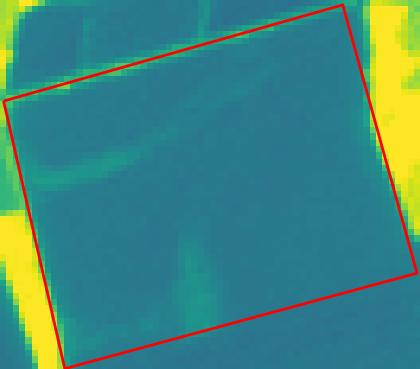

2015-08-09


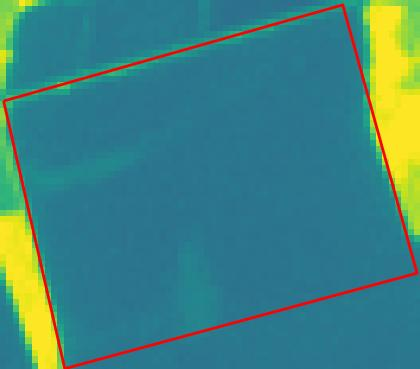

2015-08-26


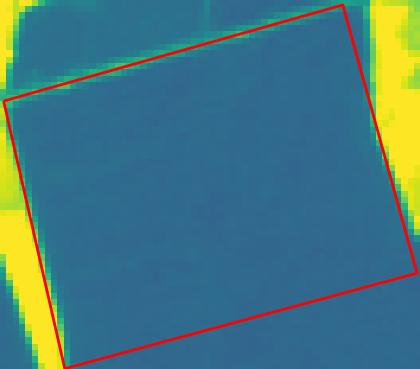

2015-08-29


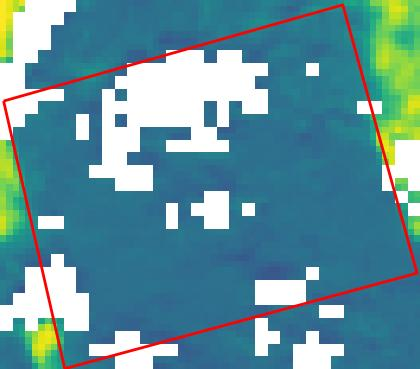

2015-09-28


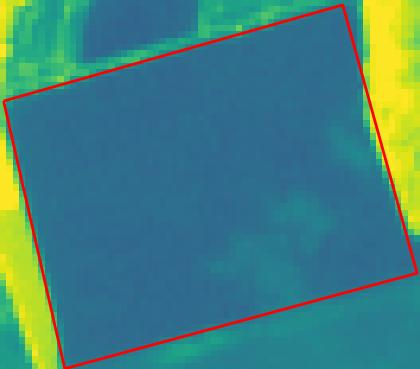

2015-11-27


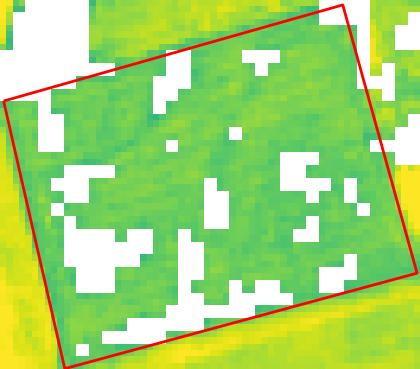

2016-04-02


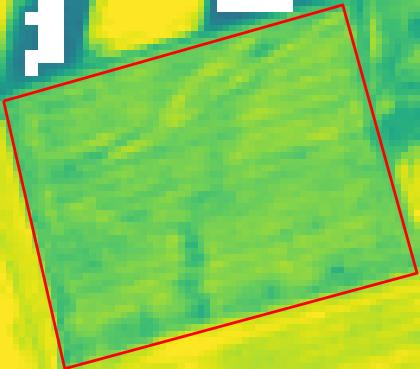

2016-04-12


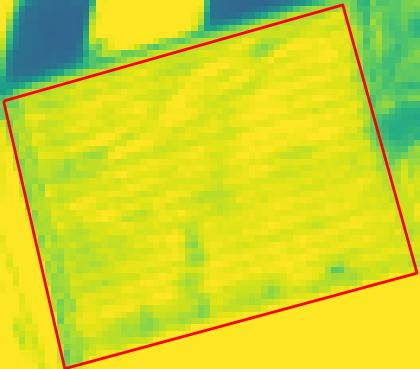

2016-04-22


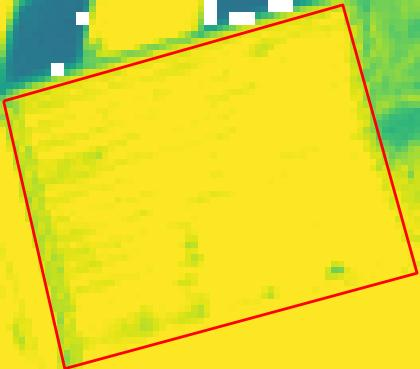

2016-05-02


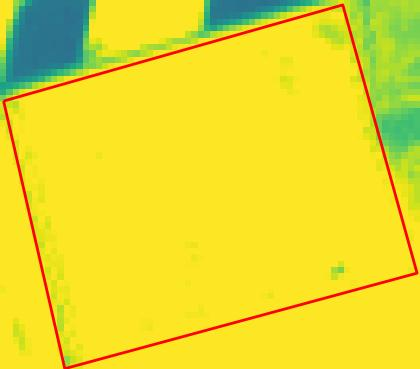

2016-05-05


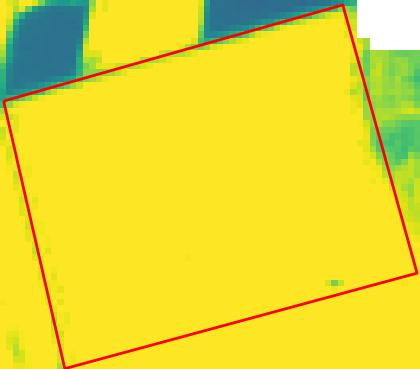

2016-06-24


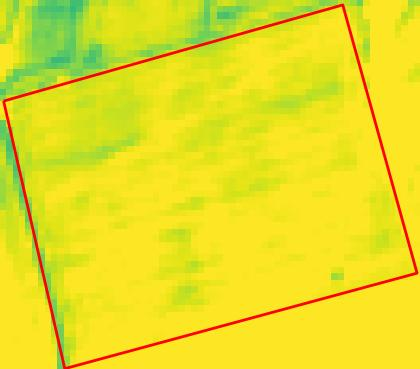

2016-08-23


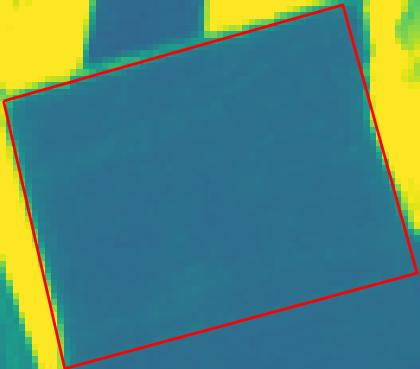

2016-08-30


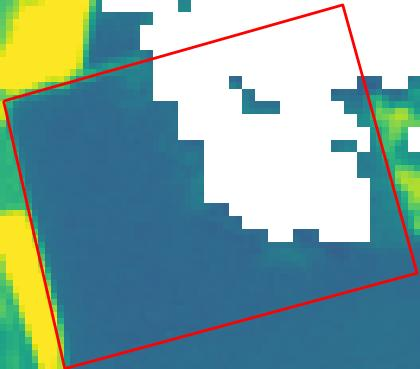

2016-09-12


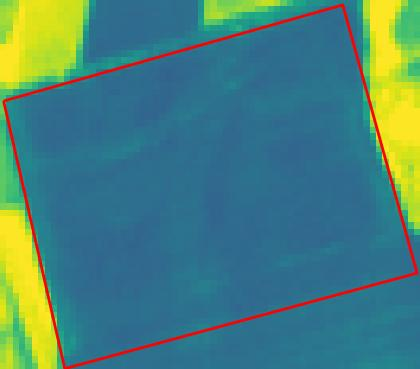

2016-09-29


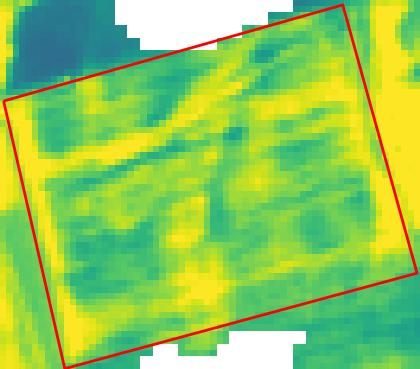

2016-11-28


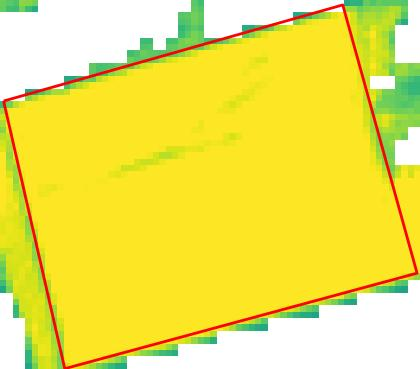

2016-12-31


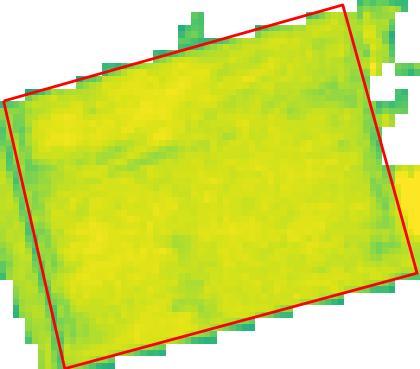

2017-03-28


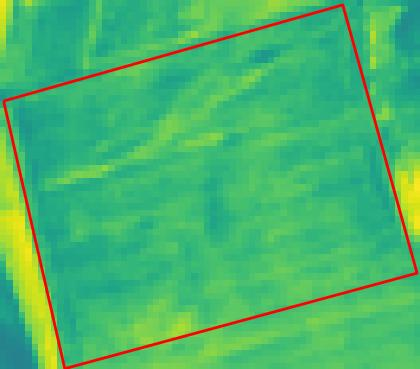

2017-04-30


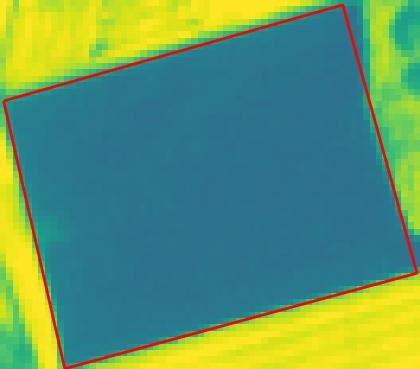

2017-05-10


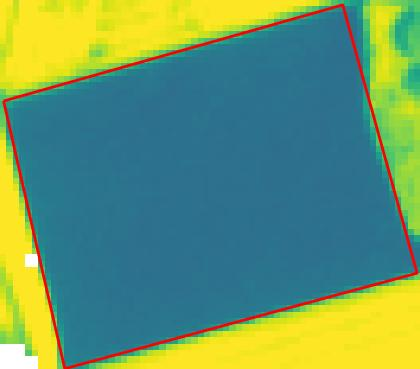

2017-05-27


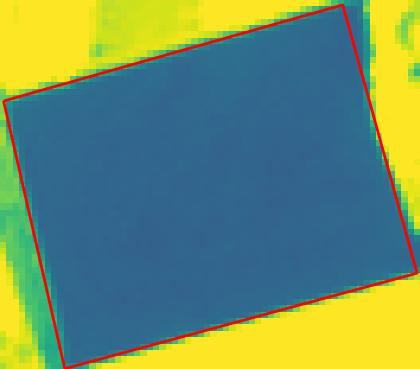

2017-06-19


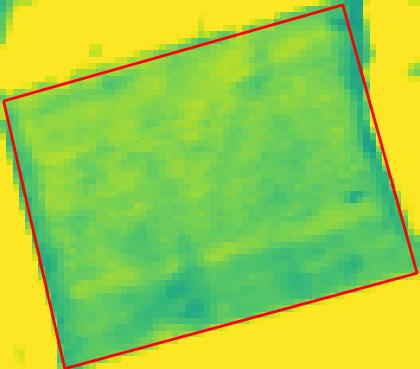

2017-07-06


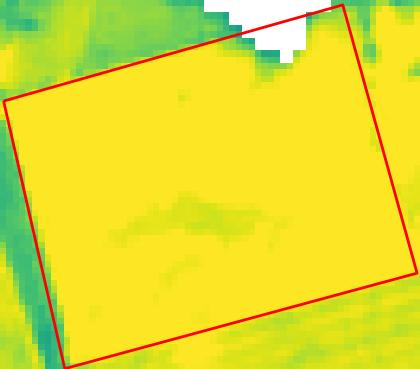

2017-08-23


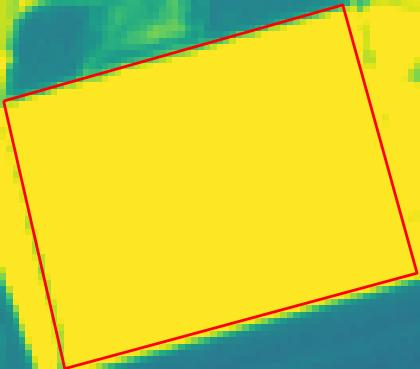

2017-09-04


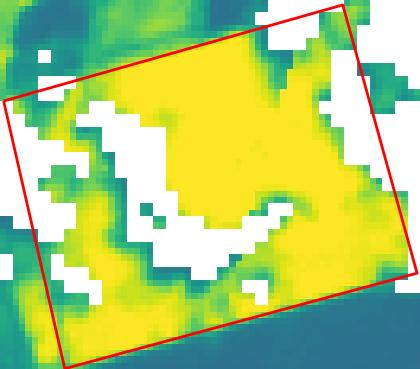

2017-10-14


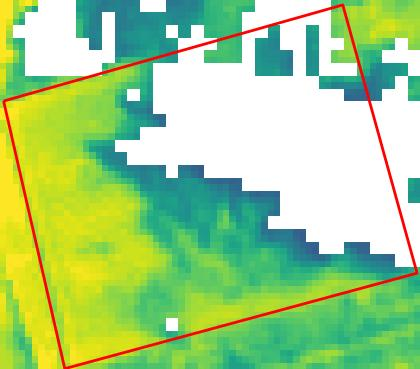

2017-10-17


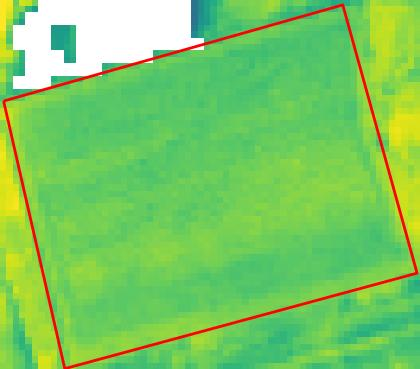

2017-10-19


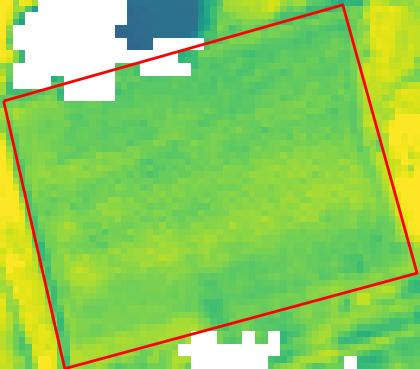

2018-04-07


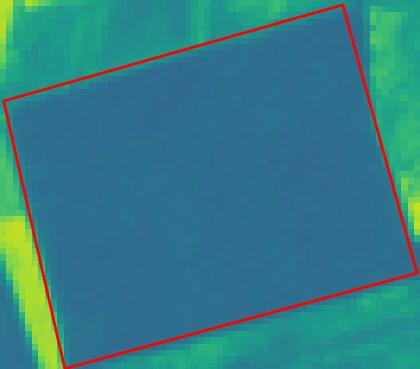

2018-04-10


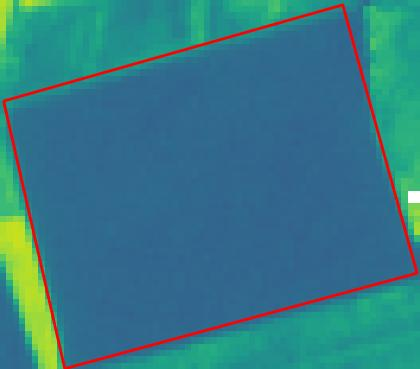

2018-04-12


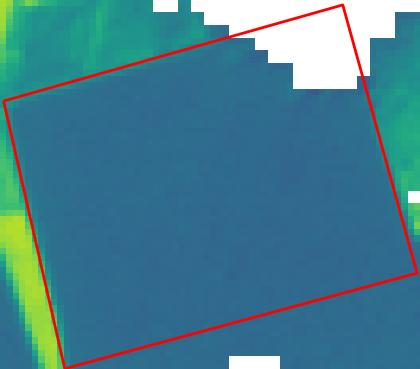

2018-04-17


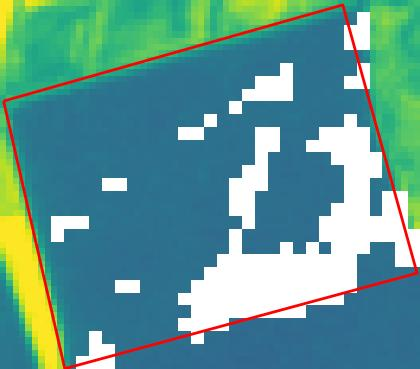

2018-04-20


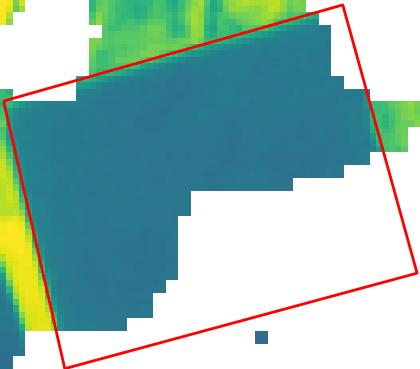

2018-04-22


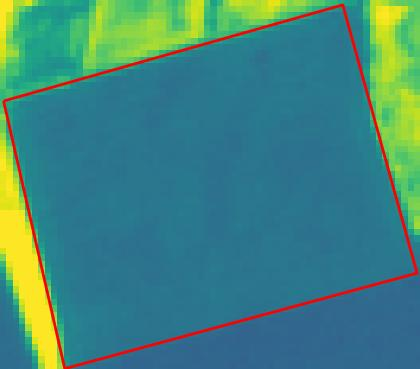

2018-05-05


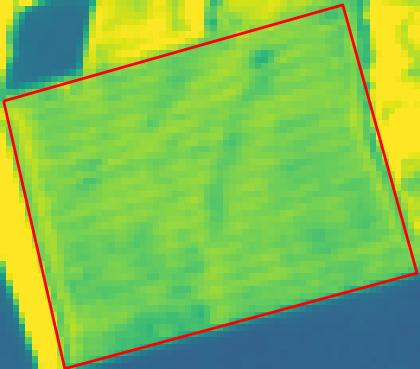

2018-05-07


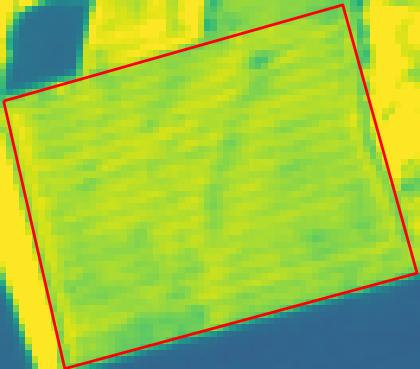

2018-05-20


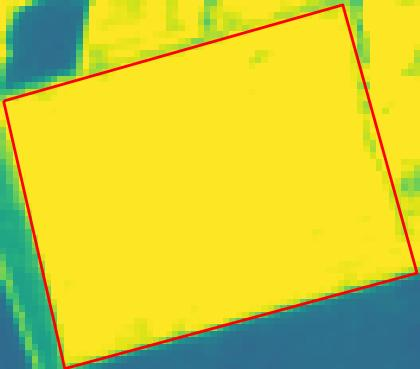

2018-05-22


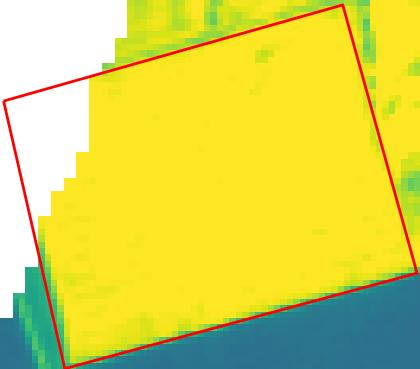

2018-06-06


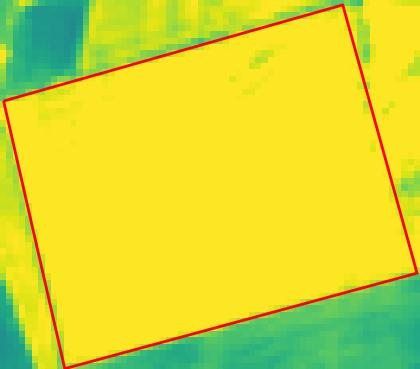

2018-06-11


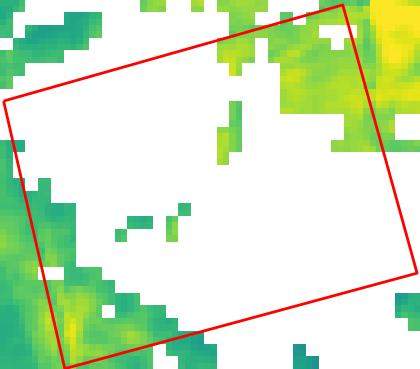

2018-06-29


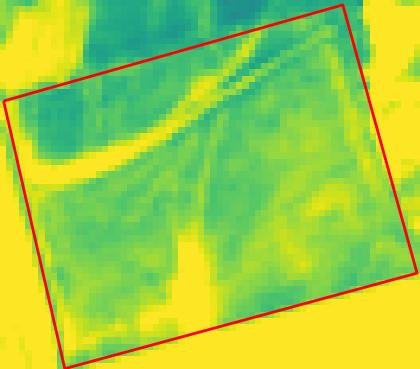

2018-07-01


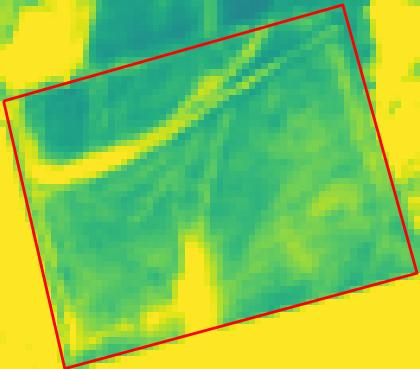

2018-07-09


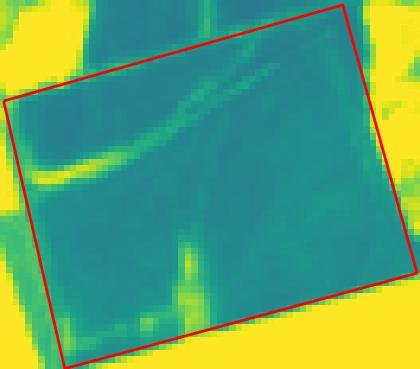

2018-07-16


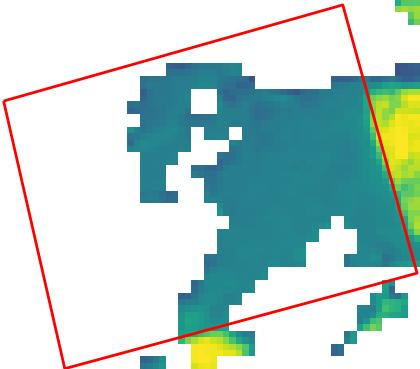

2018-07-19


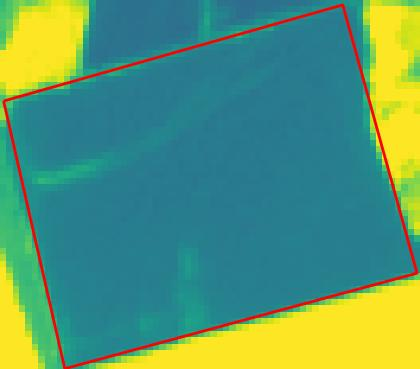

2018-07-24


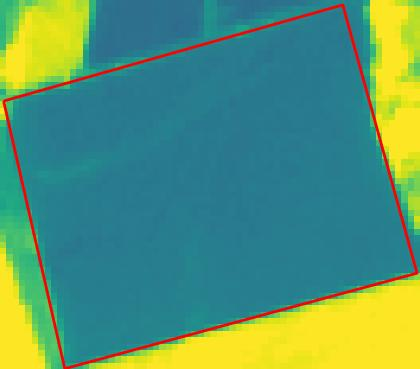

2018-07-26


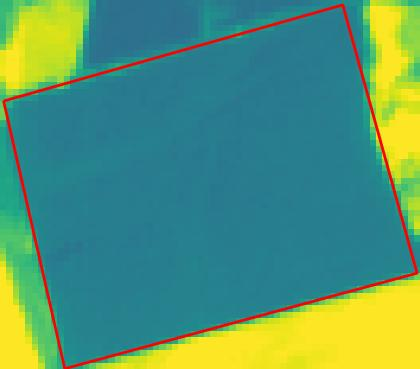

2018-08-18


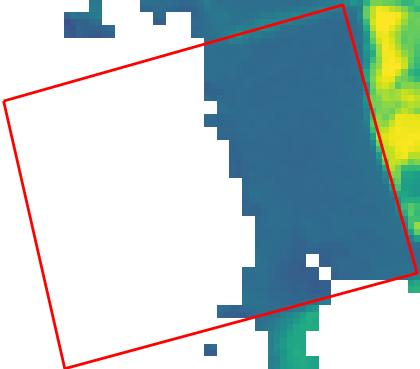

2018-08-23


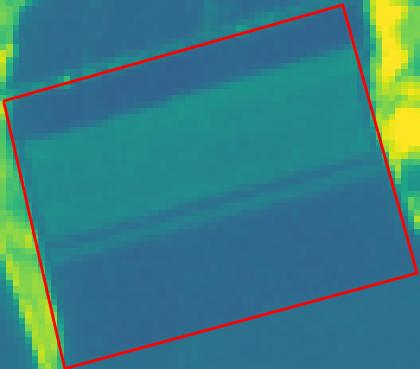

2018-09-12


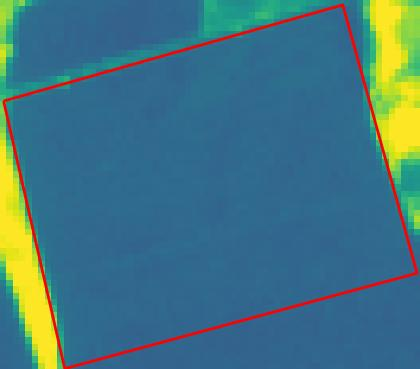

2018-09-19


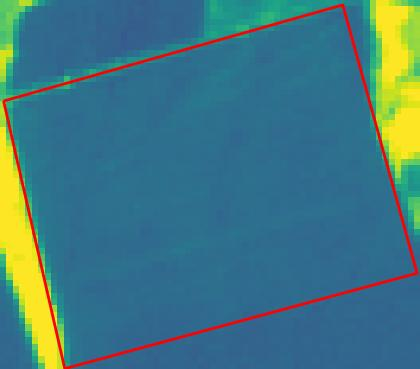

2018-09-27


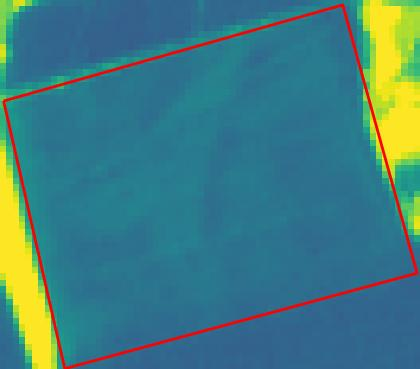

2018-09-29


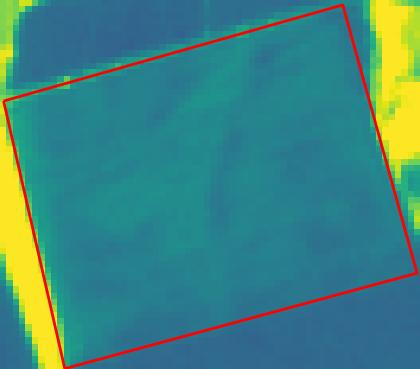

2018-10-12


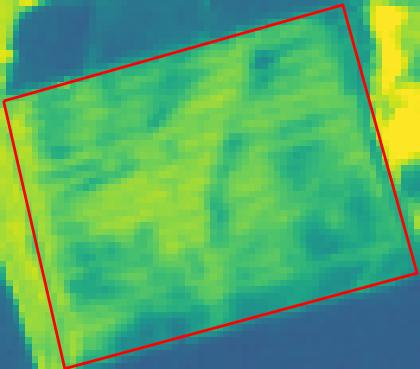

2018-10-14


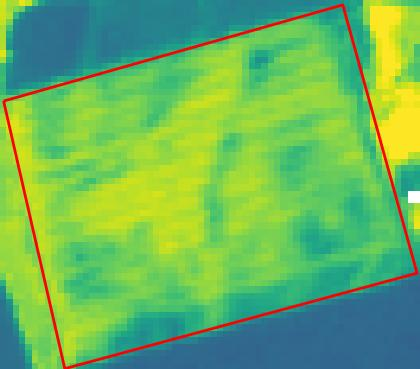

2018-11-03


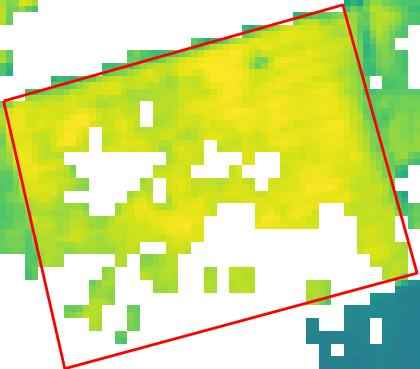

2018-11-16


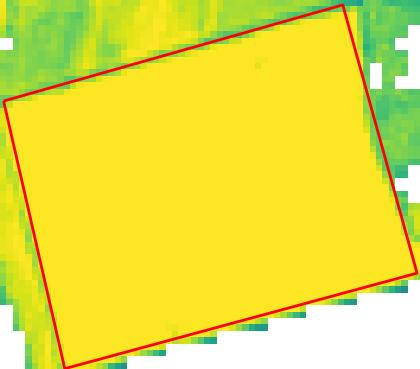

2018-11-18


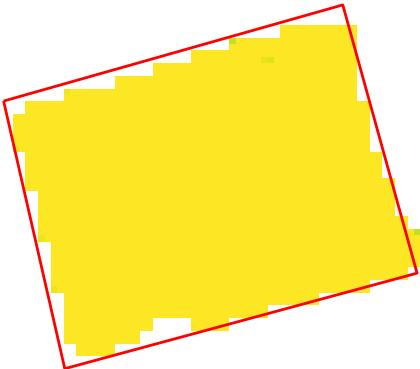

2019-02-16


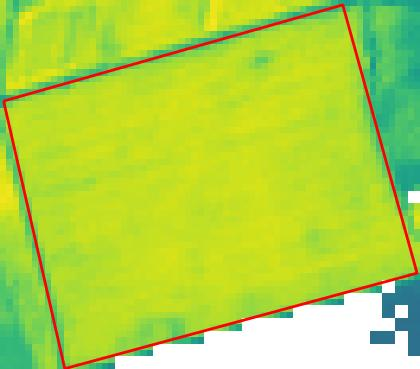

2019-02-24


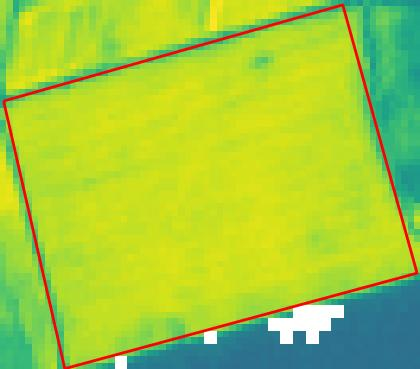

2019-02-26


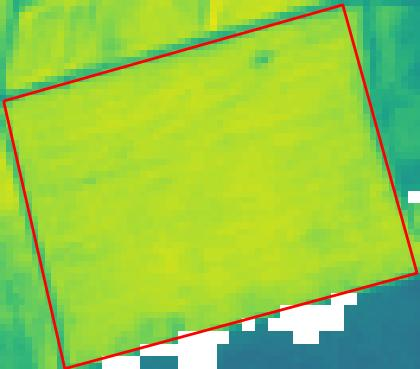

2019-03-21


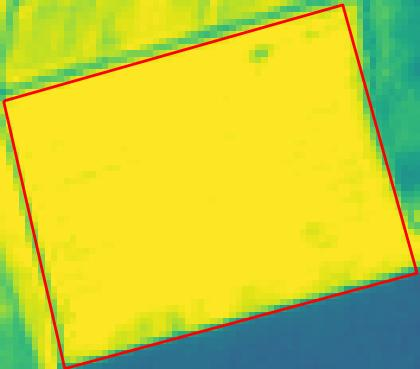

2019-04-07


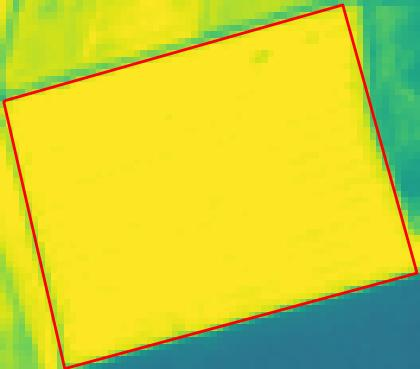

2019-04-15


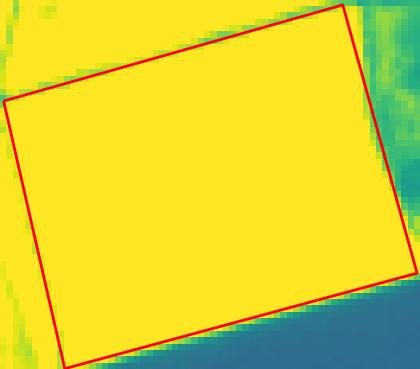

2019-04-17


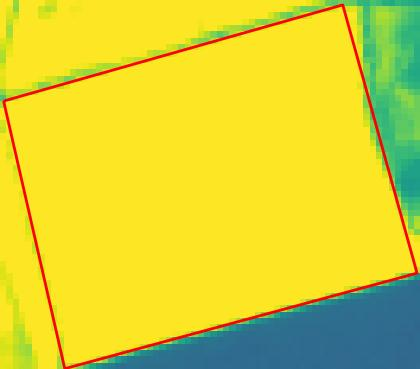

2019-04-20


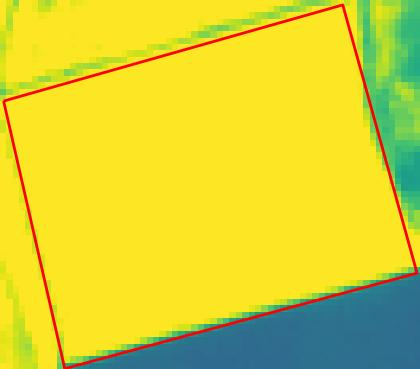

2019-04-22


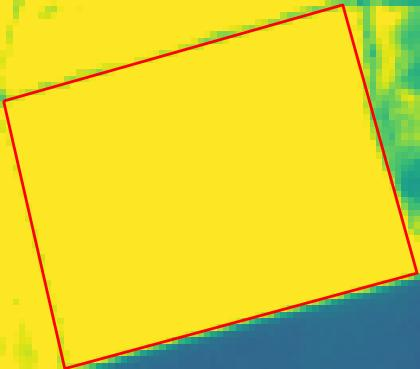

2019-04-30


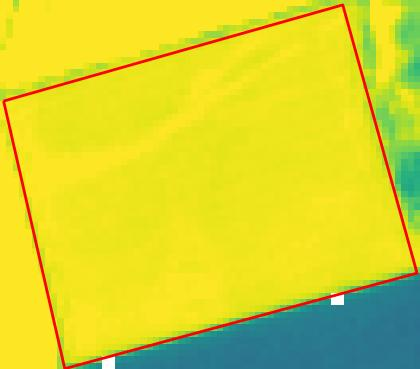

2019-05-12


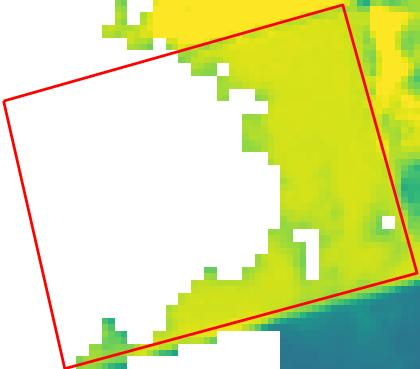

2019-06-19


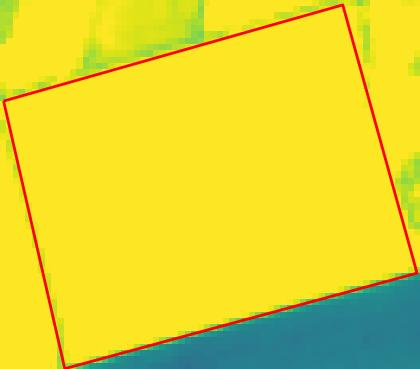

2019-06-26


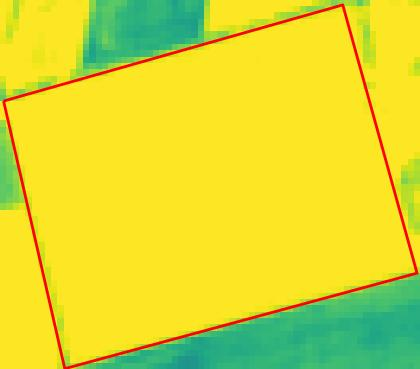

2019-06-29


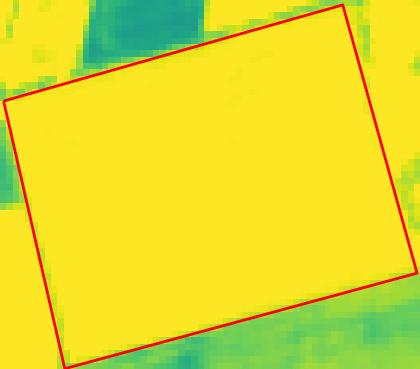

2019-07-24


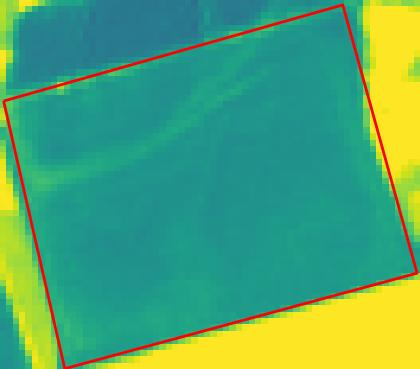

2019-08-23


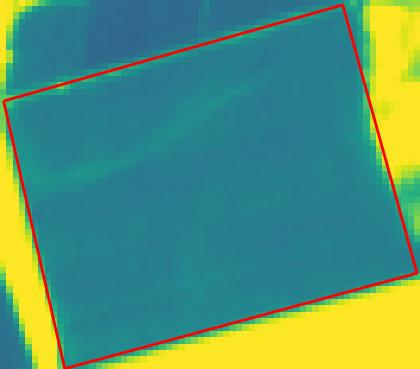

2019-08-25


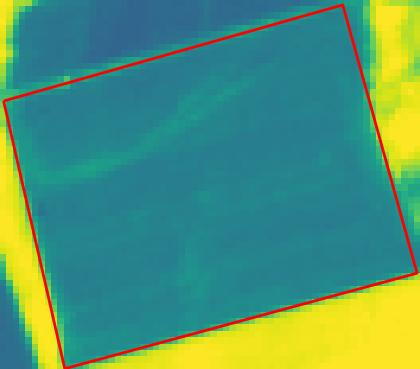

2019-09-04


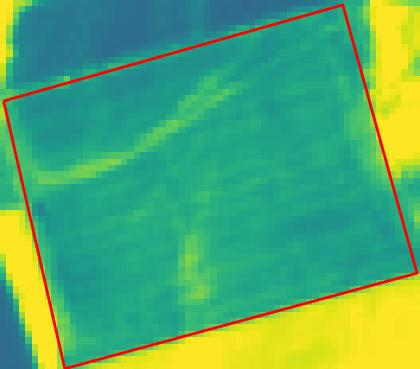

2019-09-14


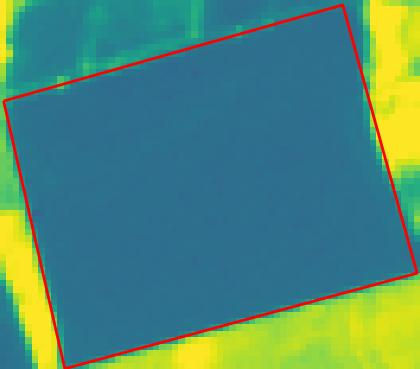

2019-09-22


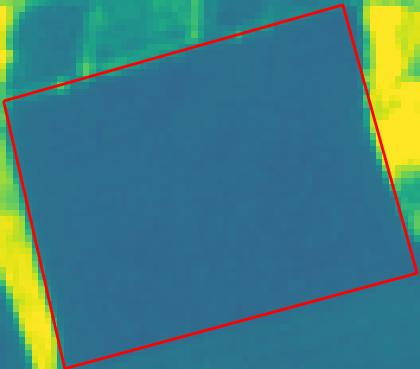

2019-10-12


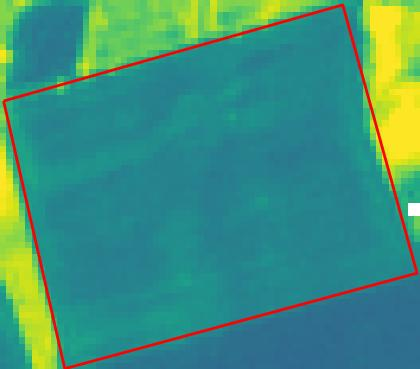

2019-10-14


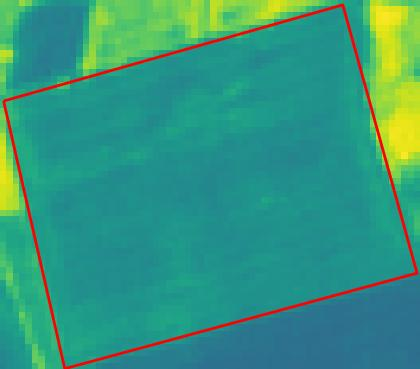

2020-01-02


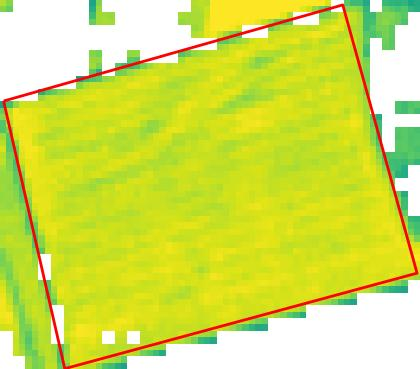

2020-01-15


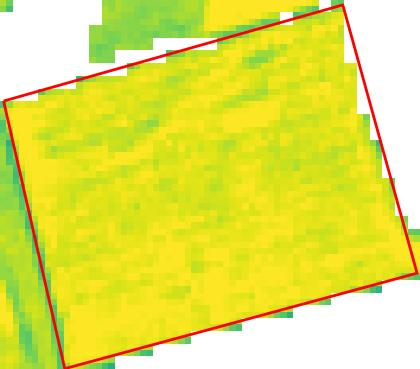

2020-01-17


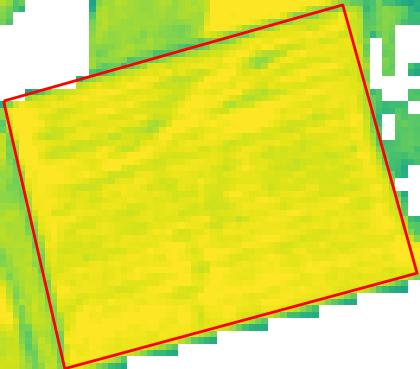

2020-03-17


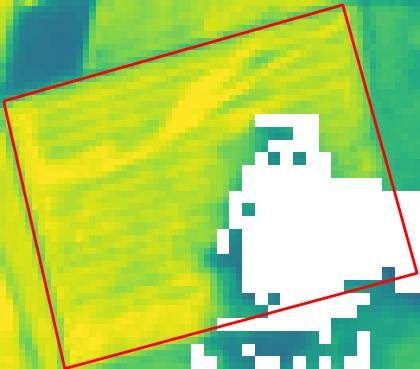

2020-03-22


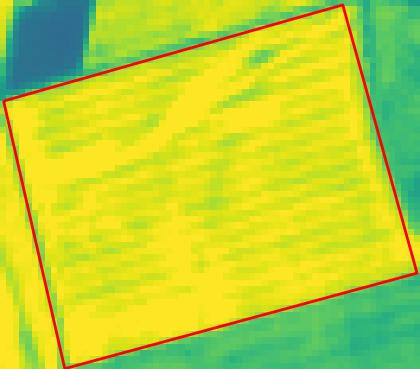

2020-03-25


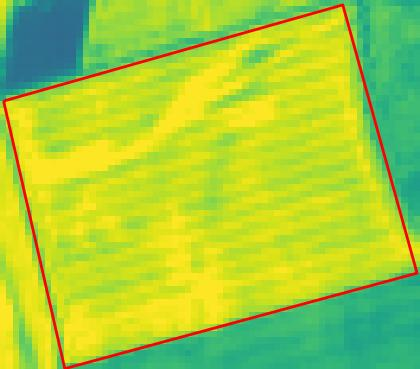

2020-03-27


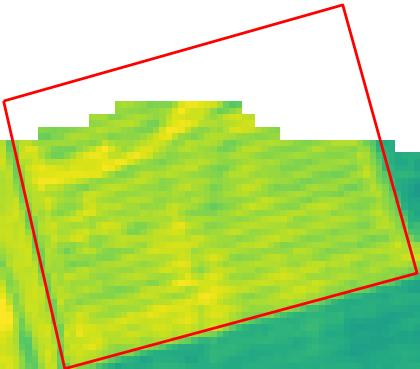

2020-04-01


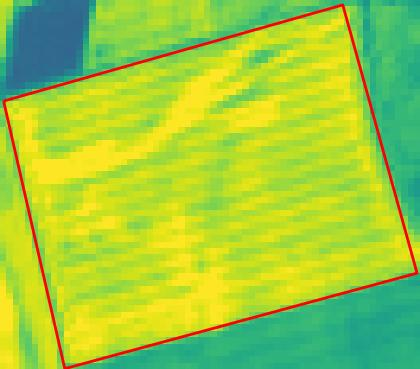

2020-04-04


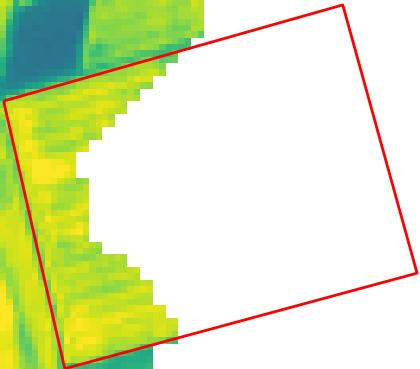

2020-04-06


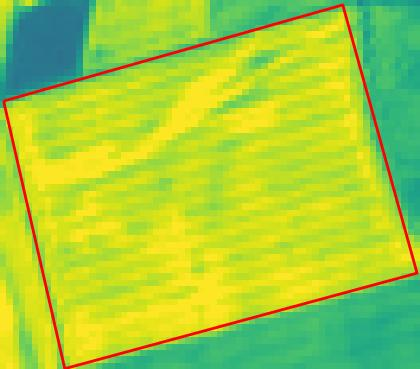

2020-04-09


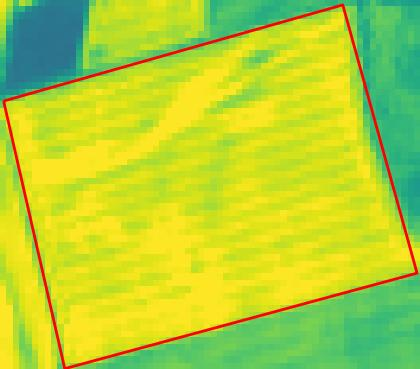

2020-04-11


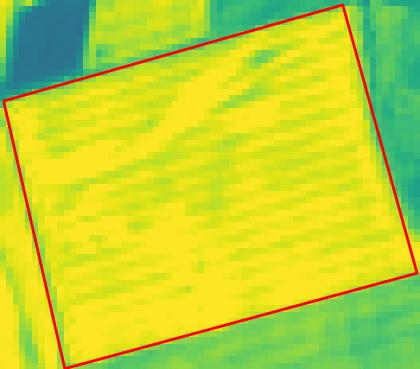

2020-04-19


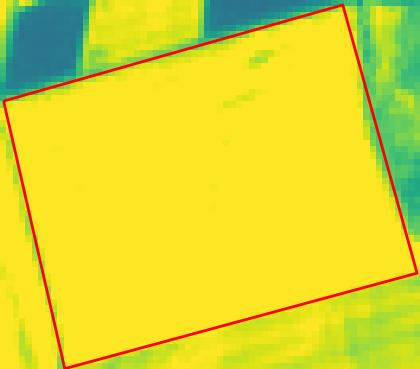

2020-04-21


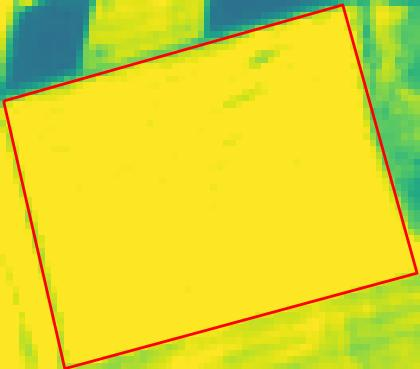

2020-04-24


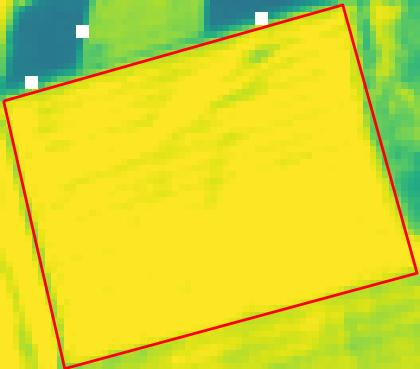

2020-04-26


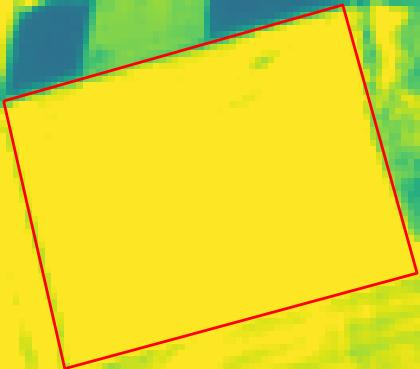

2020-05-06


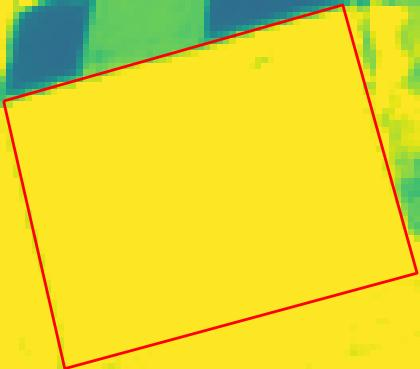

2020-05-21


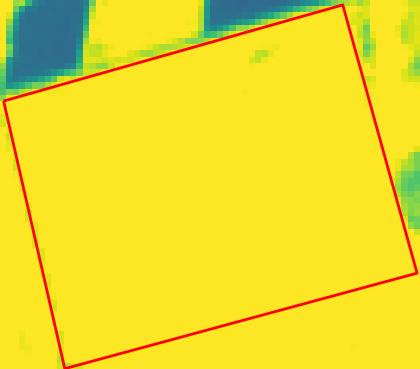

2020-05-29


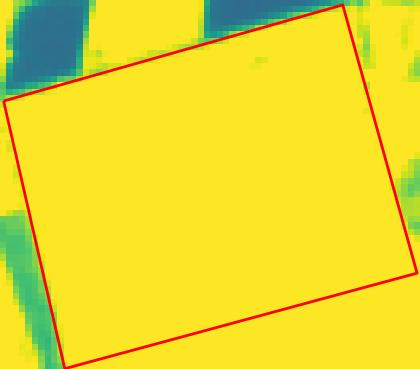

2020-06-23


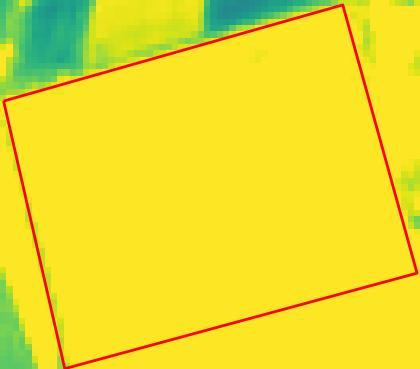

2020-07-13


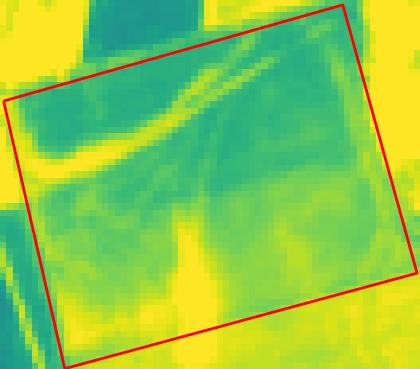

2020-08-07


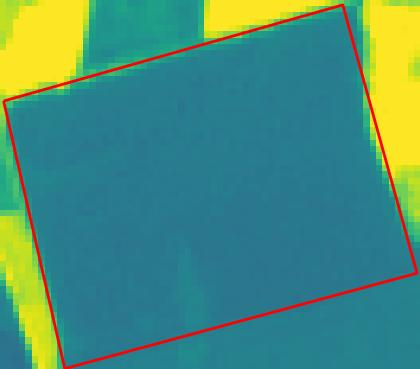

2020-08-09


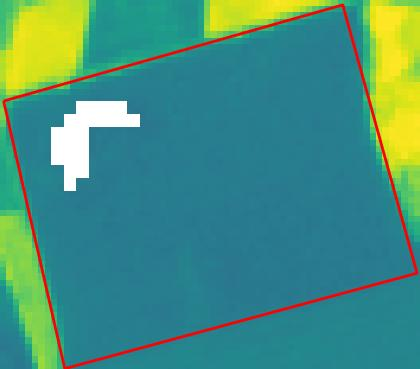

2020-08-12


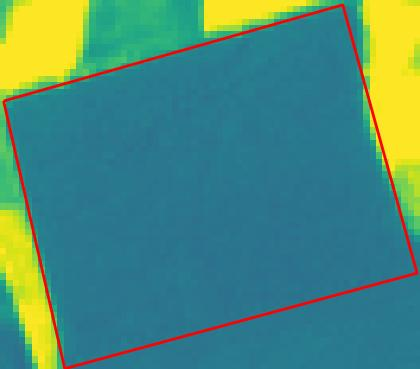

2020-09-11


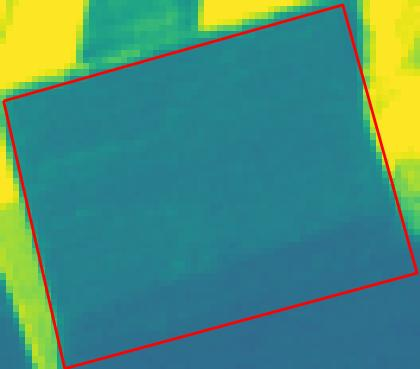

2020-09-18


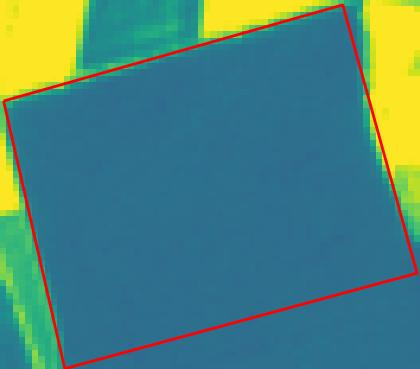

2020-09-21


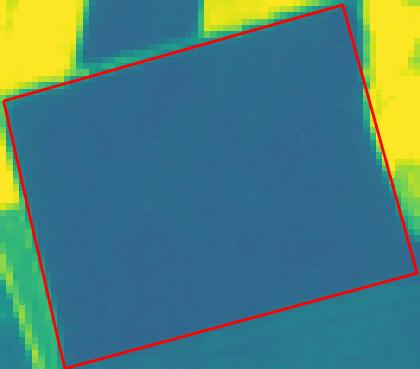

2020-11-07


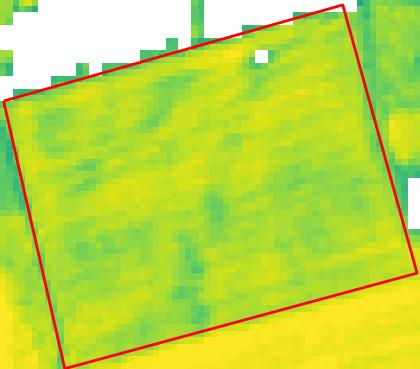

2020-11-30


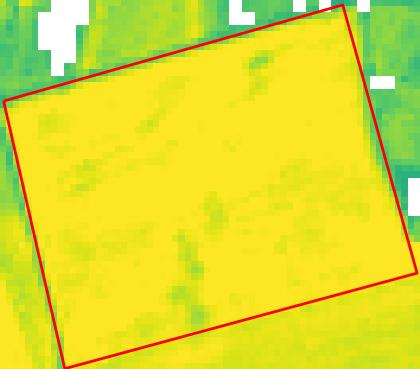

2021-02-23


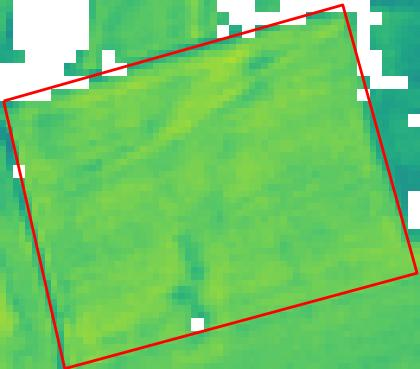

2021-02-25


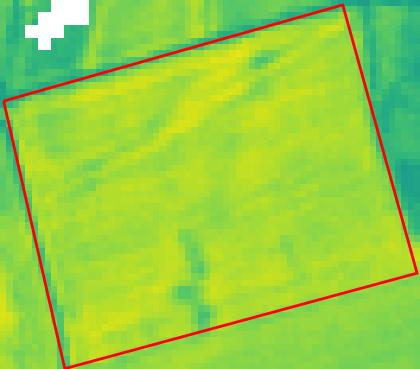

2021-02-28


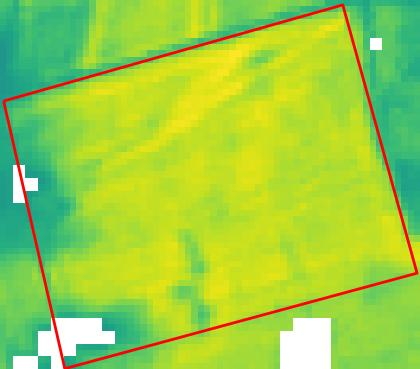

2021-03-02


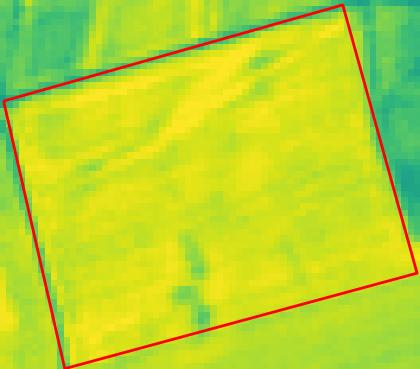

2021-03-30


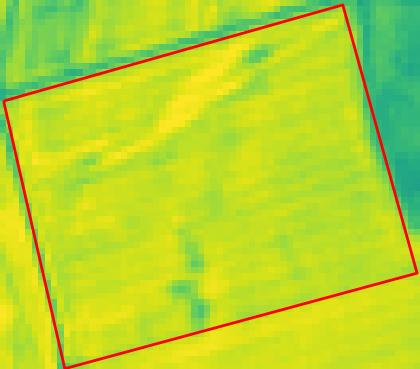

2021-04-01


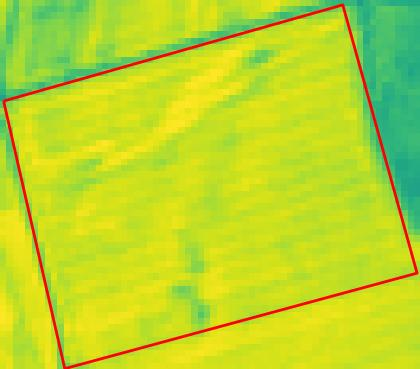

2021-04-21


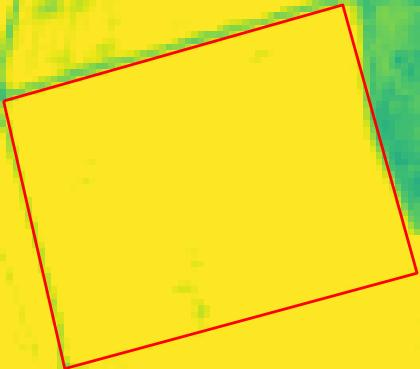

2021-04-26


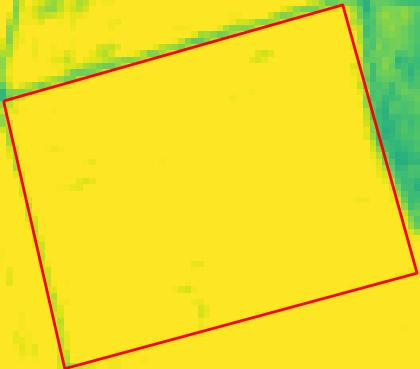

2021-05-31


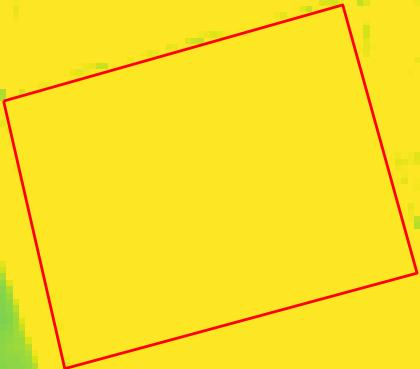

2021-06-13


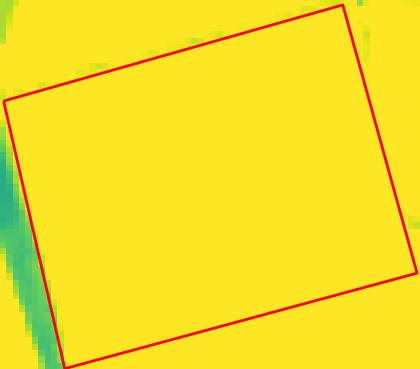

2021-06-18


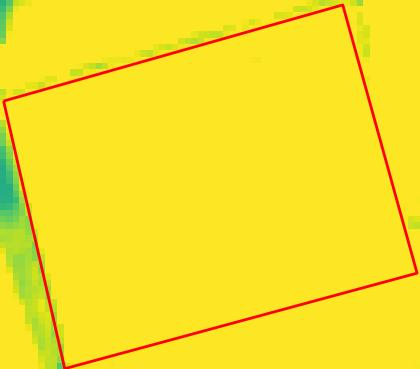

2021-07-18


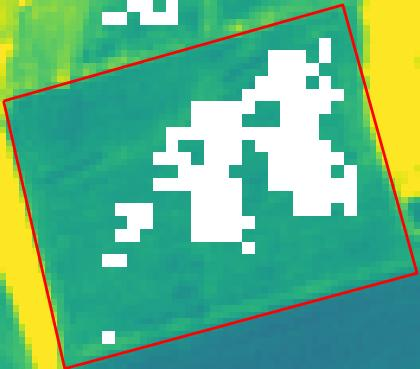

2021-07-30


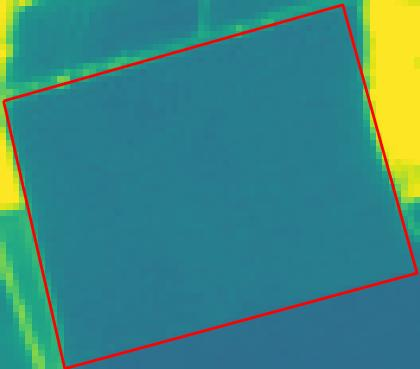

2021-08-14


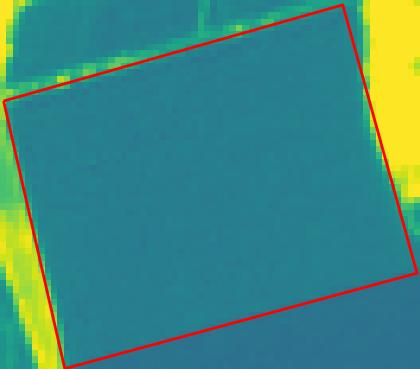

2021-09-03


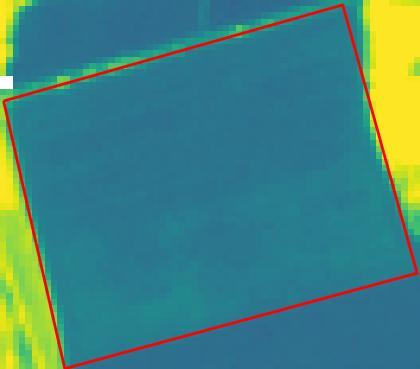

2021-09-06


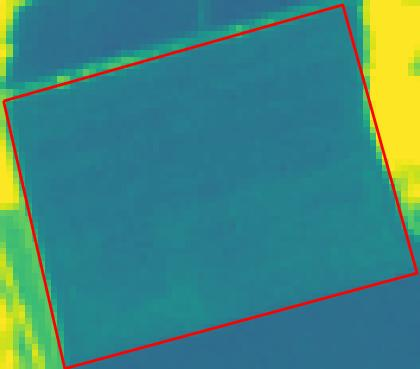

2021-09-08


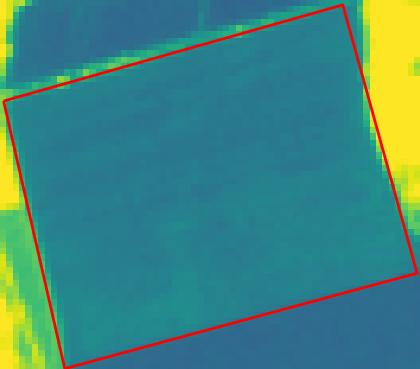

2021-09-26


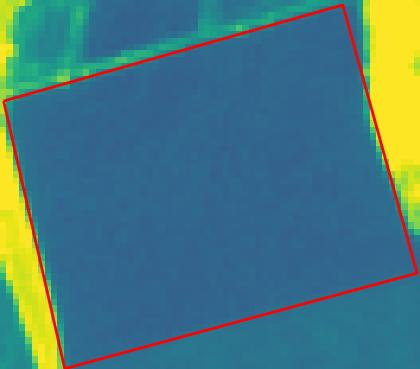

2021-12-20


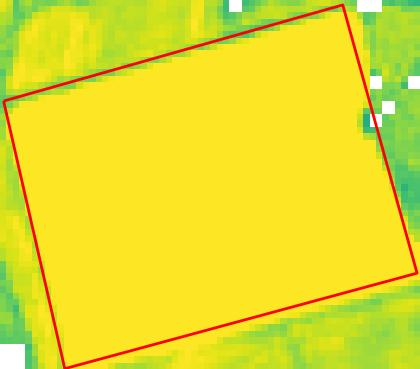

2022-01-06


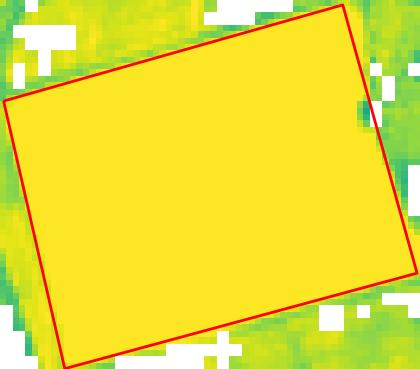

2022-02-13


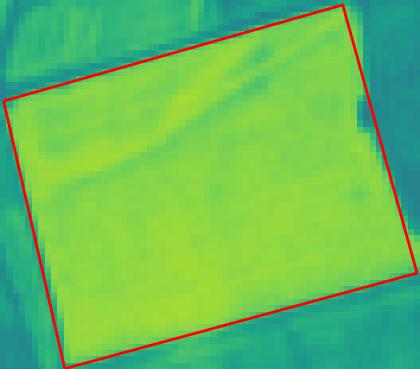

2022-02-23


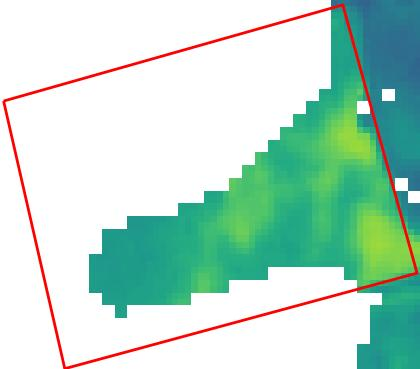

2022-02-28


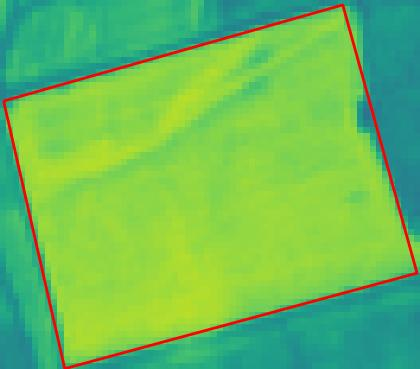

2022-03-05


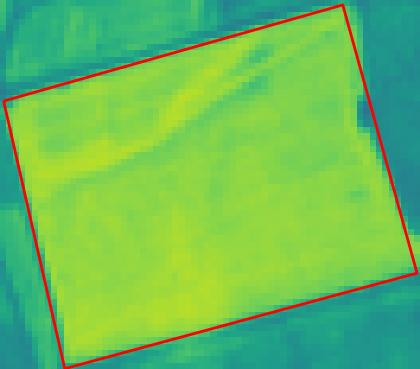

2022-03-07


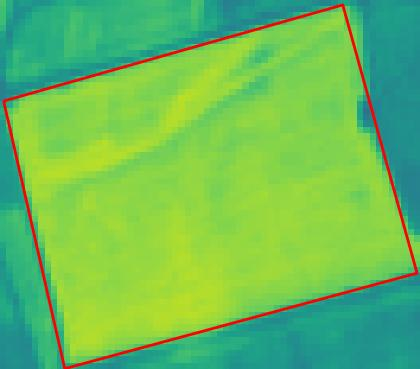

2022-03-10


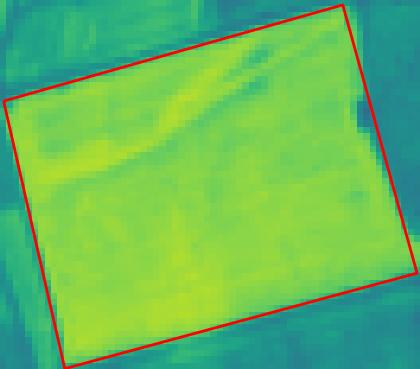

2022-03-20


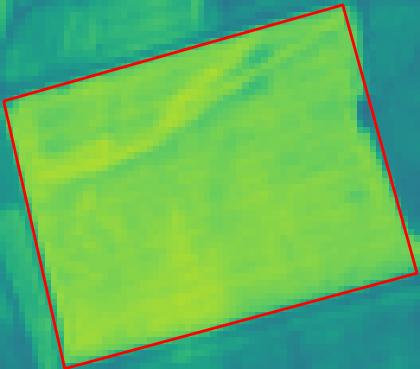

2022-03-22


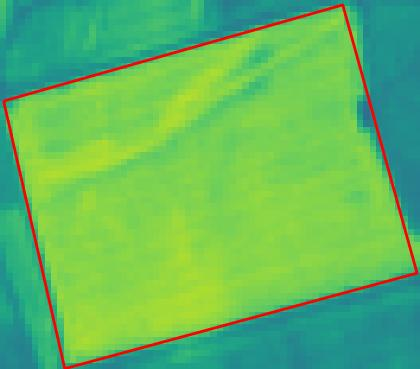

2022-03-25


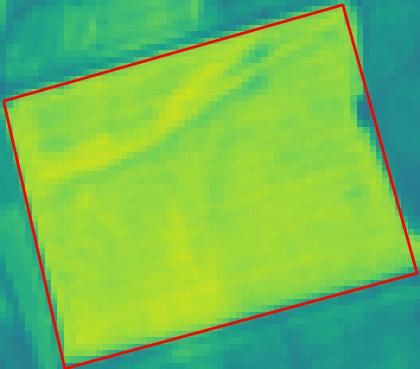

2022-04-11


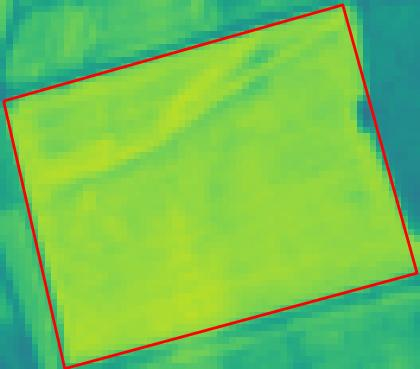

2022-04-16


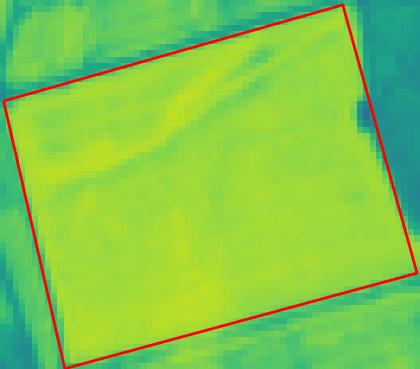

2022-05-09


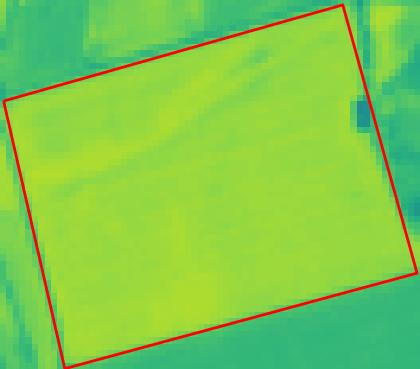

2022-06-15


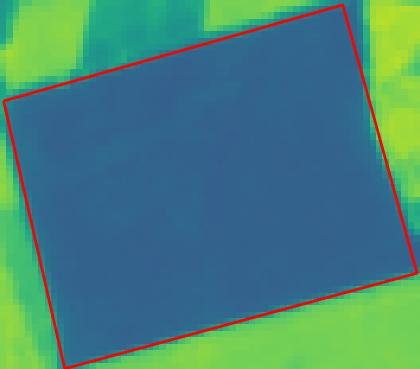

2022-06-18


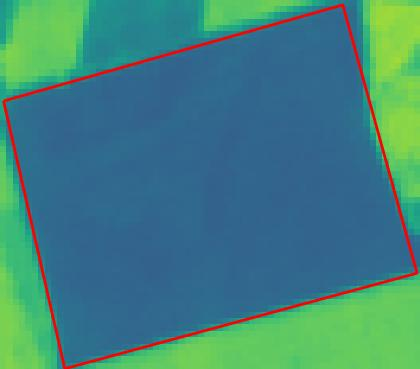

2022-06-23


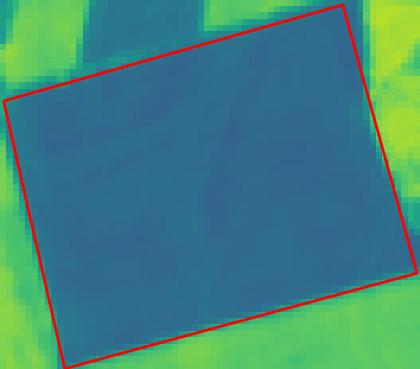

2022-06-28


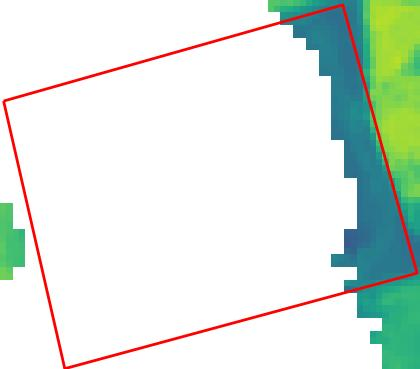

2022-06-30


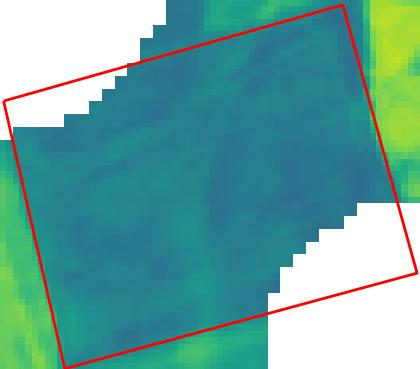

2022-07-08


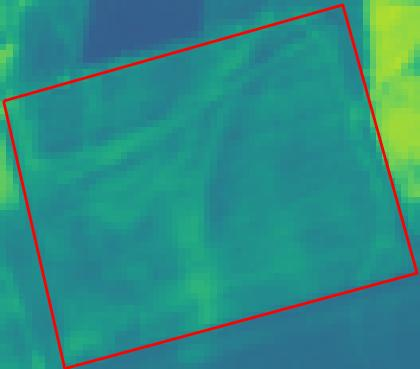

2022-07-20


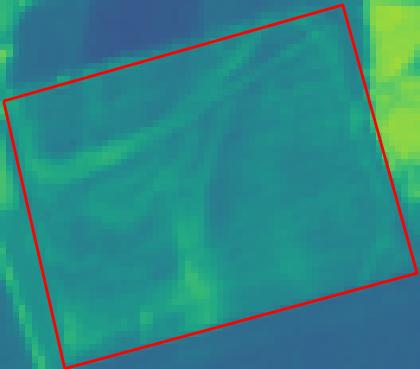

2022-08-07


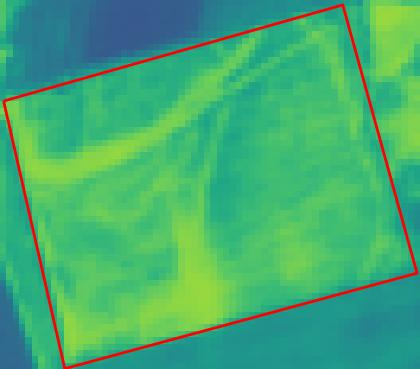

2022-08-09


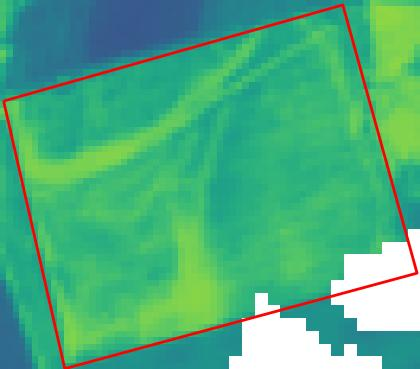

2022-08-12


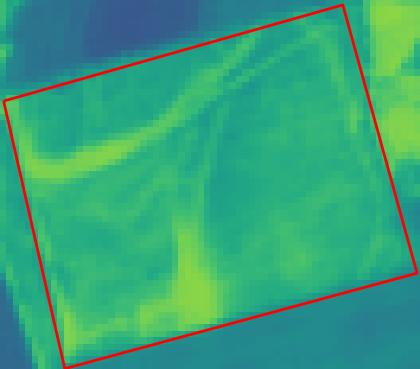

2022-08-22


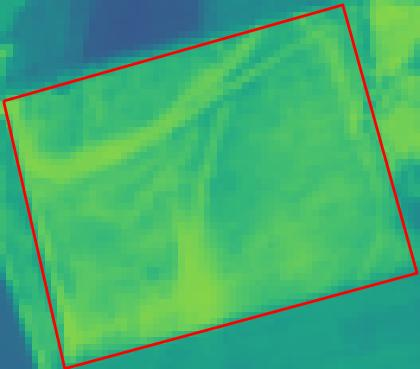

2022-08-24


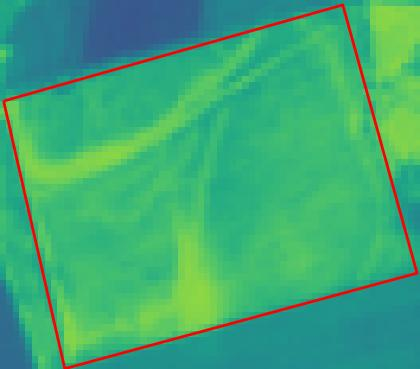

2022-09-06


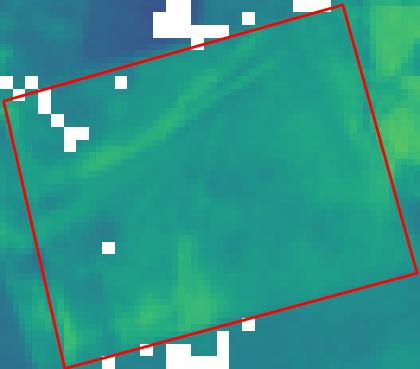

2022-09-21


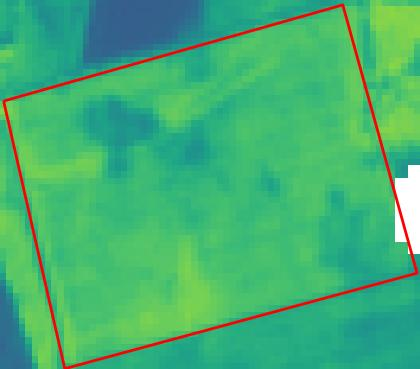

2023-02-08


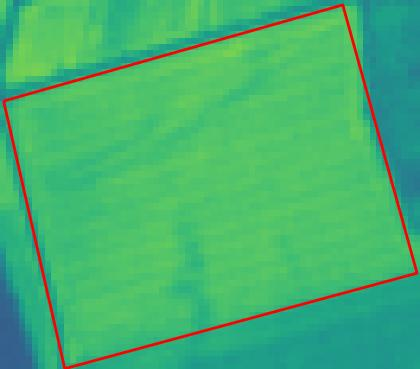

2023-02-15


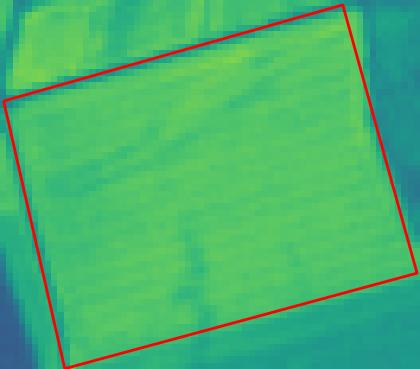

2023-02-28


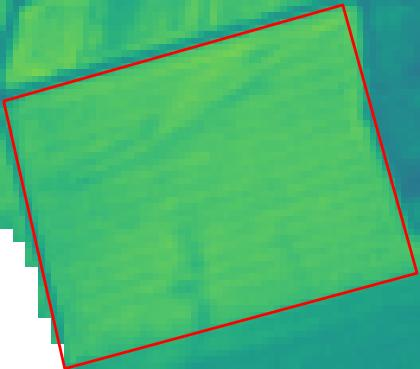

2023-03-02


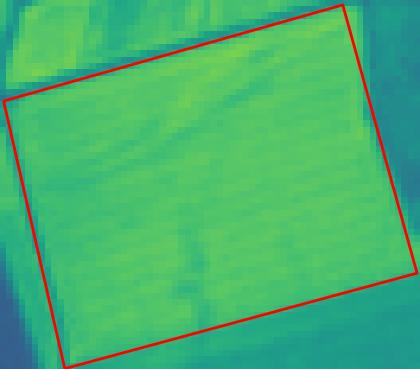

2023-04-04


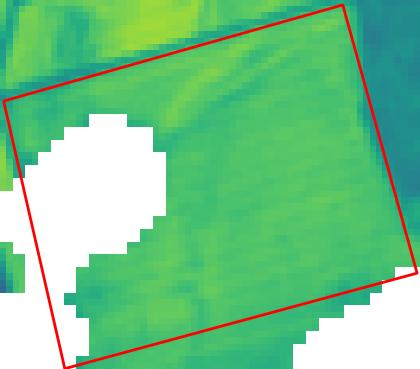

2023-04-06


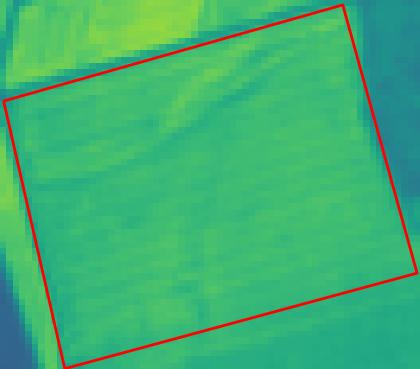

2023-04-21


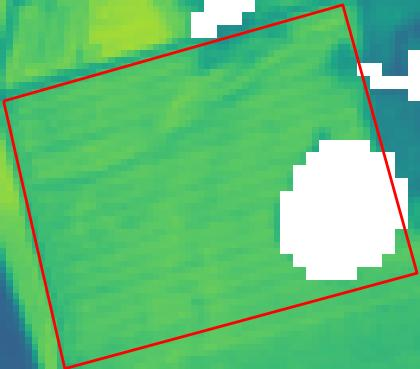

2023-05-26


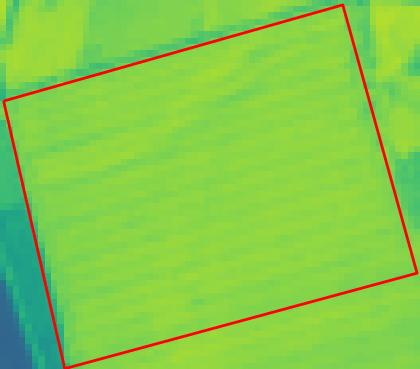

2023-05-31


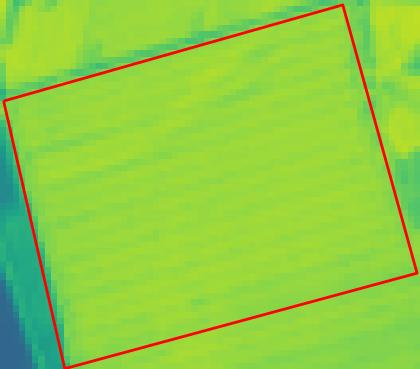

2023-06-03


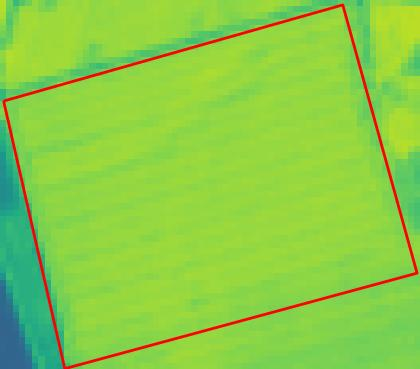

2023-06-05


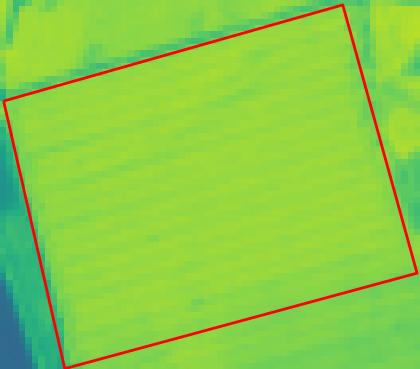

2023-06-10


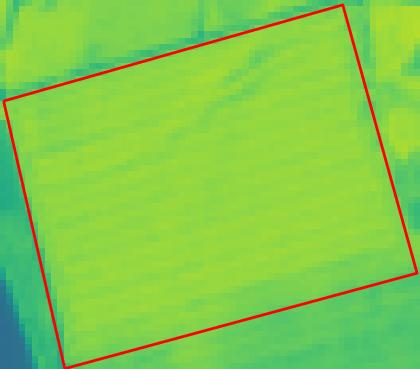

2023-06-13


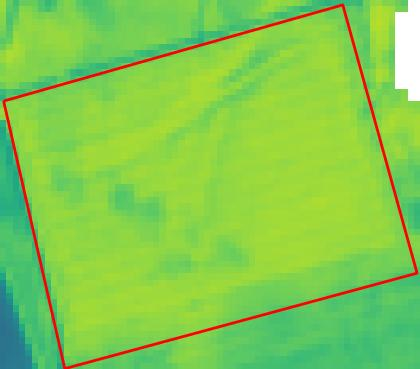

2023-06-25


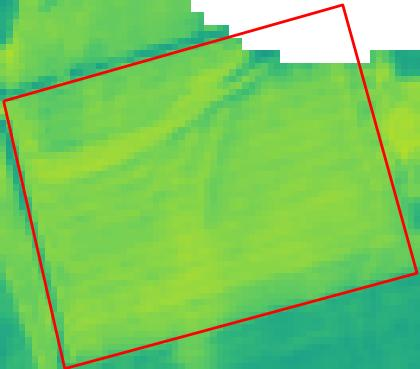

2023-07-08


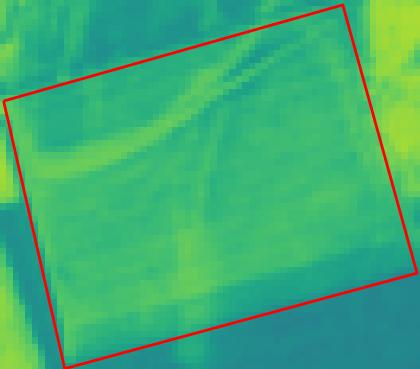

2023-08-19


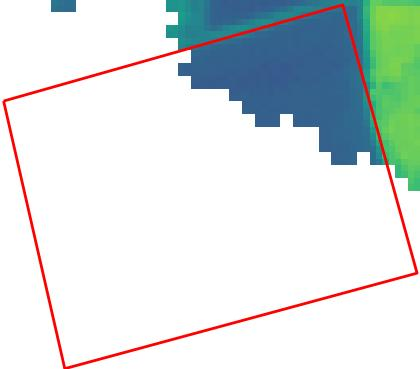

2023-09-06


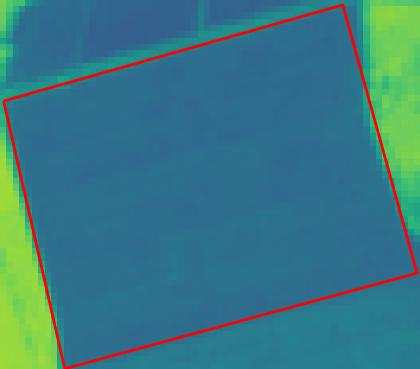

2023-09-08


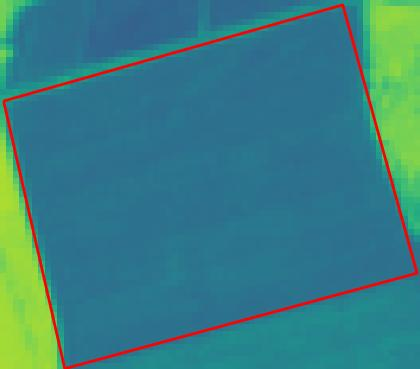

2023-09-16


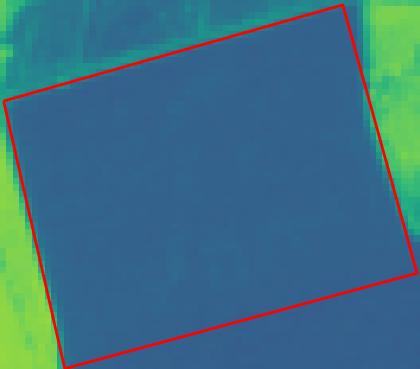

2023-09-26


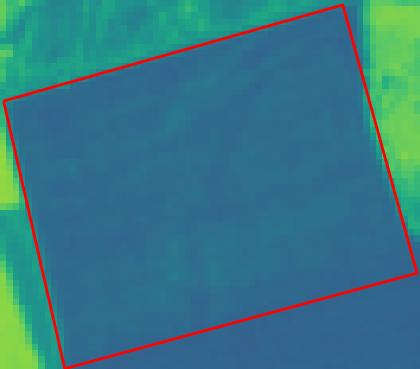

2023-09-28


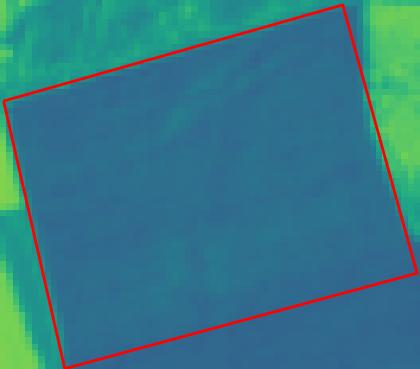

2024-01-09


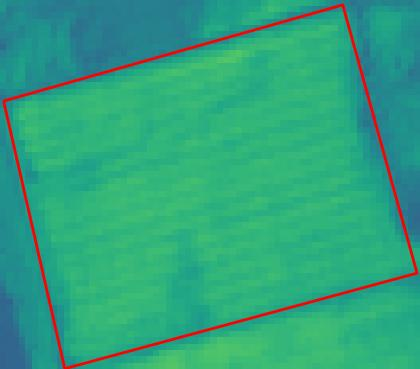

2024-01-11


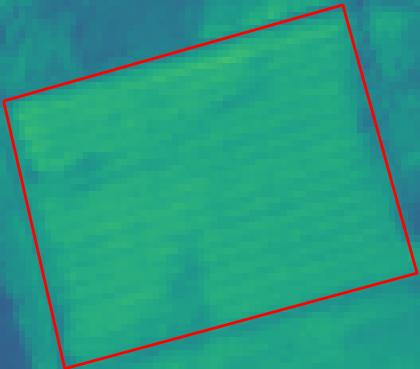

2024-04-30


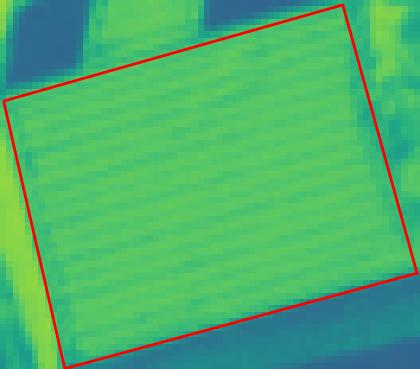

2024-05-13


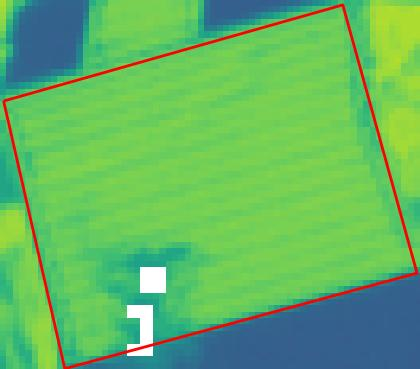

2024-05-15


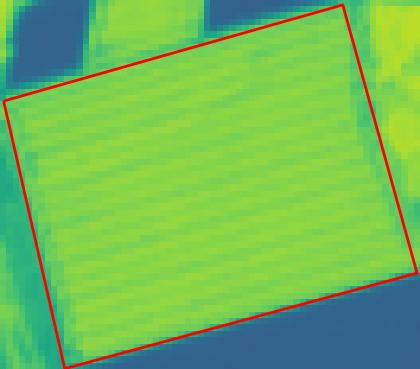

2024-06-09


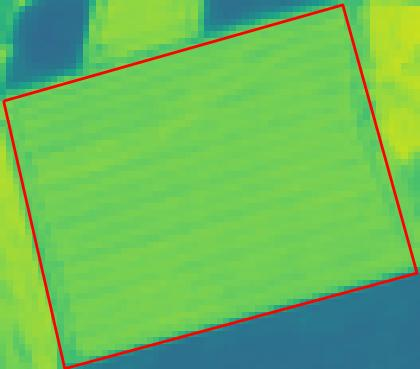

2024-07-07


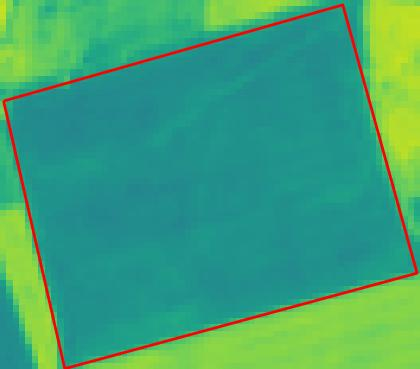

2024-07-09


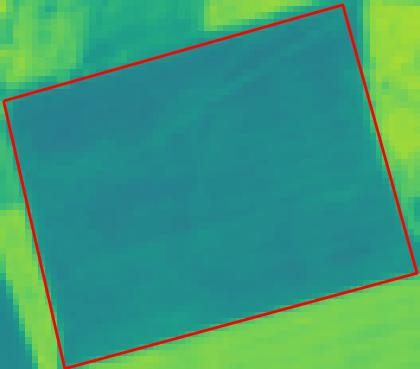

2024-07-22


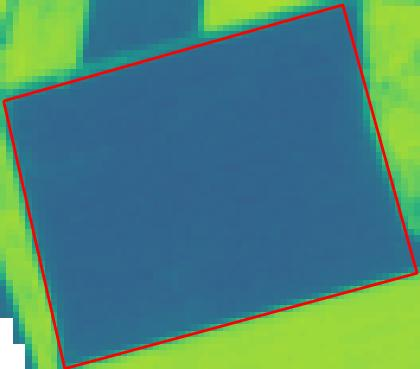

2024-07-29


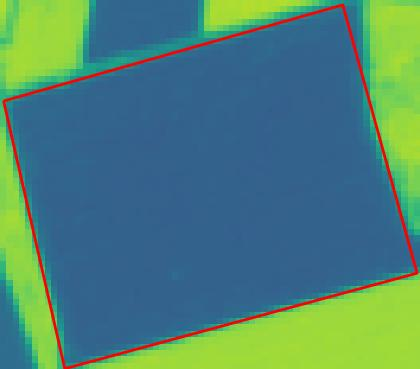

2024-08-06


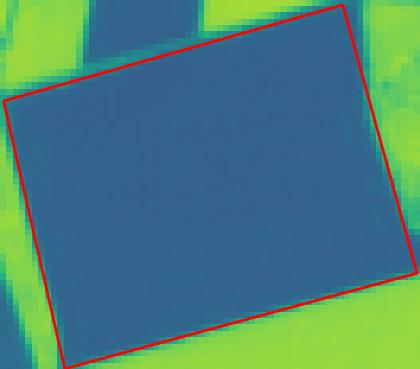

2024-08-13


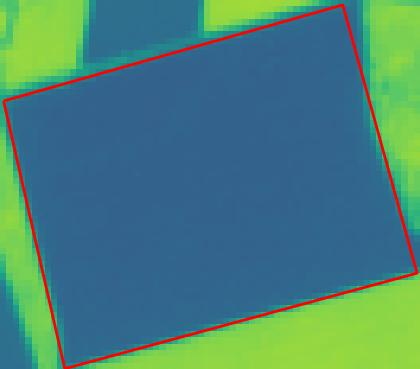

2024-08-16


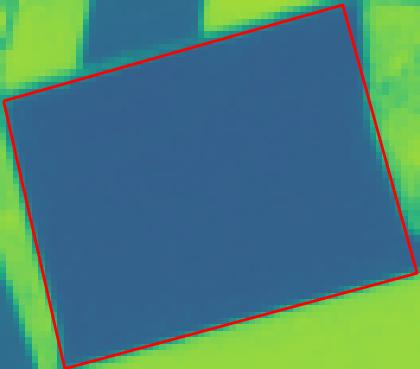

2024-08-26


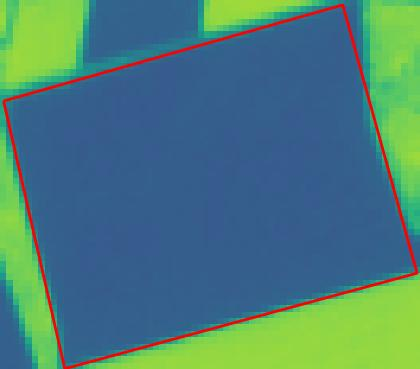

2024-08-28


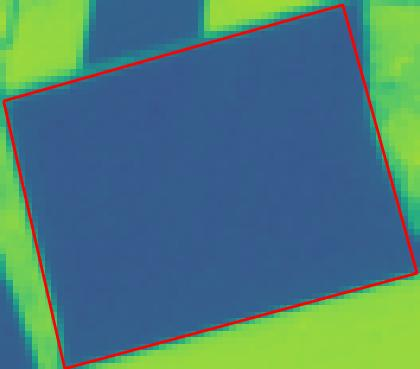

2024-09-02


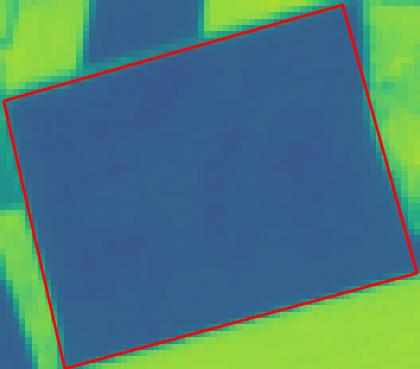

2024-09-05


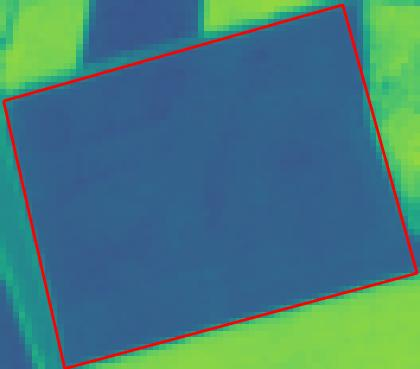

2024-09-20


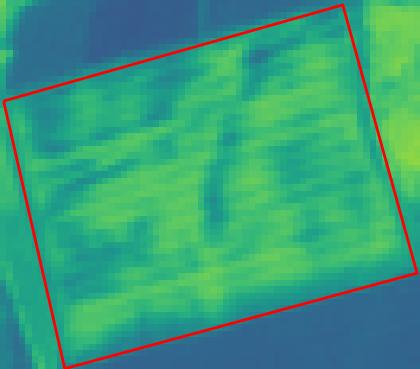

2024-10-15


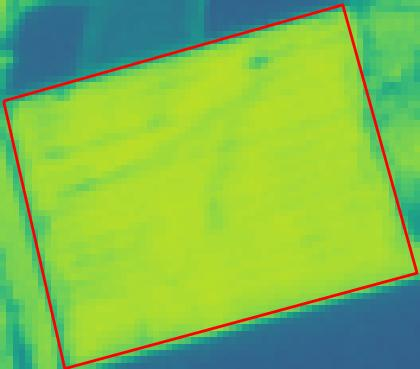

2024-10-25


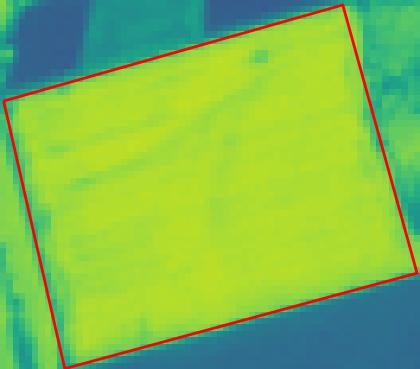

2024-12-01


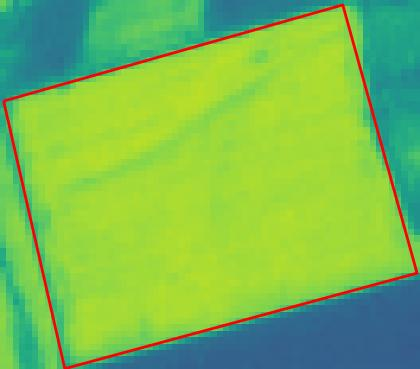

In [5]:
from IPython.display import Image
for date, value in ndvi_thumbnails.items():
    print(date)
    display(Image(value))

